In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# importing data from csv 
file_path = r'C:\Users\LENOVO\Desktop\python\Netfilx data analysis\netflix_titles.csv'
df = pd.read_csv(file_path)


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.shape

(8807, 12)

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df.isnull().sum() # here we get values of null in individual columns 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
# lets one by one check as handle null values 

In [17]:
# first is director 

# filter rows where director is null
null_director = df[df['director'].isnull()]
null_director.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...


In [19]:
duplicate_rows = df[df.duplicated(subset=['title'])]
duplicate_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [21]:
# here no dupliacte values for title . if duplicate found we can access missing value for original form duplicate

In [22]:
# now exchange null values to unknown
df['director'].fillna("Unknown", inplace=True)

In [23]:
df['director'].isnull().sum()

np.int64(0)

In [24]:
# lets move to next column i.e cast 
# check if we can get original value of null form data other wise replace with "Unknown"

In [34]:
df['cast'].fillna("Unknown",inplace=True)

In [35]:
df['cast'].isnull().sum()

np.int64(0)

In [37]:
#  lets move to next column i.e country

In [38]:
df['country'].fillna("Unknown",inplace=True)

In [40]:
df['country'].isnull().sum()

np.int64(0)

In [41]:
# similarly for remaining columns 
df.dropna(subset=["date_added"], inplace=True)
df['rating'].fillna("Unknown",inplace=True)
df['duration'].fillna("Unknown",inplace=True)

In [44]:
# Use format='mixed' to handle the spaces and varied formats automatically
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')

# Now this will work perfectly
df["added_year"] = df["date_added"].dt.year

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14496\841802353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


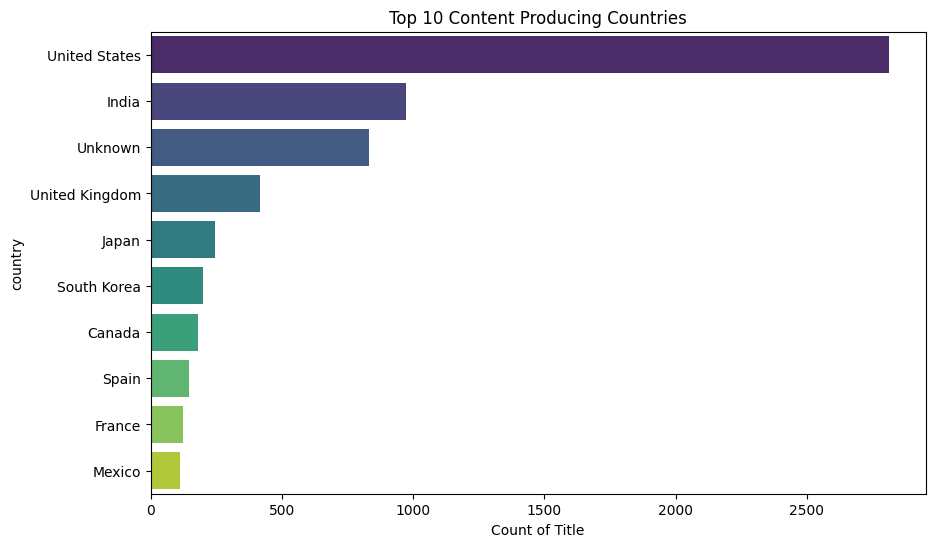

In [46]:
# Question : which country produce the most content ?

plt.figure(figsize=(10,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Count of Title')
plt.show()

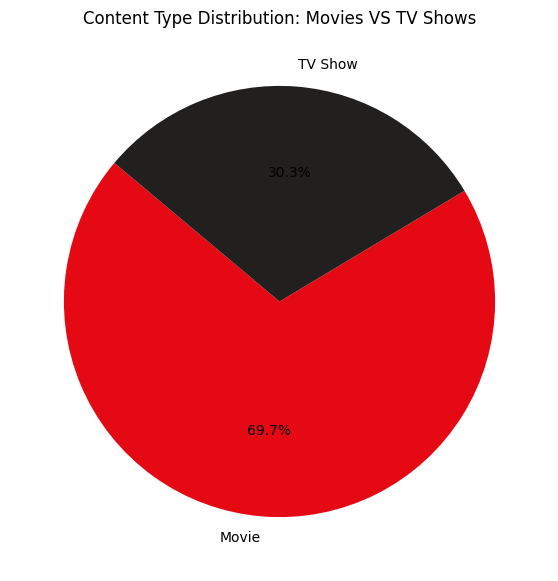

In [48]:
# QUESTION : WHAT IS THE RATIO OF MOVIES VS TV SHOWS?

plt.figure(figsize=(7,7))
count = df['type'].value_counts()
plt.pie(count , labels=count.index, autopct='%1.1f%%', startangle=140, colors=['#E50914', '#221F1F'])
plt.title('Content Type Distribution: Movies VS TV Shows')
plt.show()

In [49]:
# Question: How has production changed over the years?

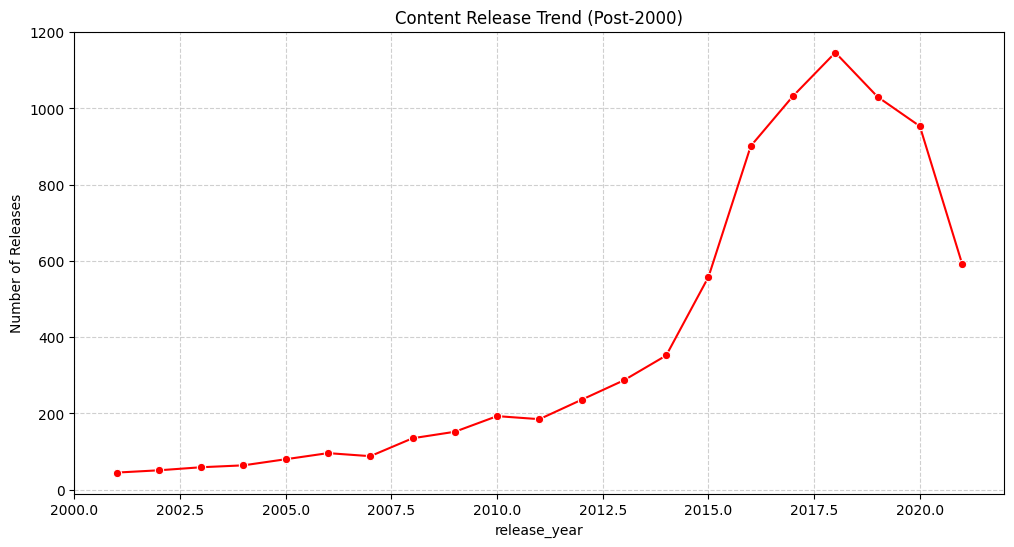

In [50]:
plt.figure(figsize=(12, 6))
release_counts = df[df['release_year'] > 2000]['release_year'].value_counts().sort_index()
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o', color='red')
plt.title('Content Release Trend (Post-2000)')
plt.ylabel('Number of Releases')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [51]:
#Question: Which genres are most common?

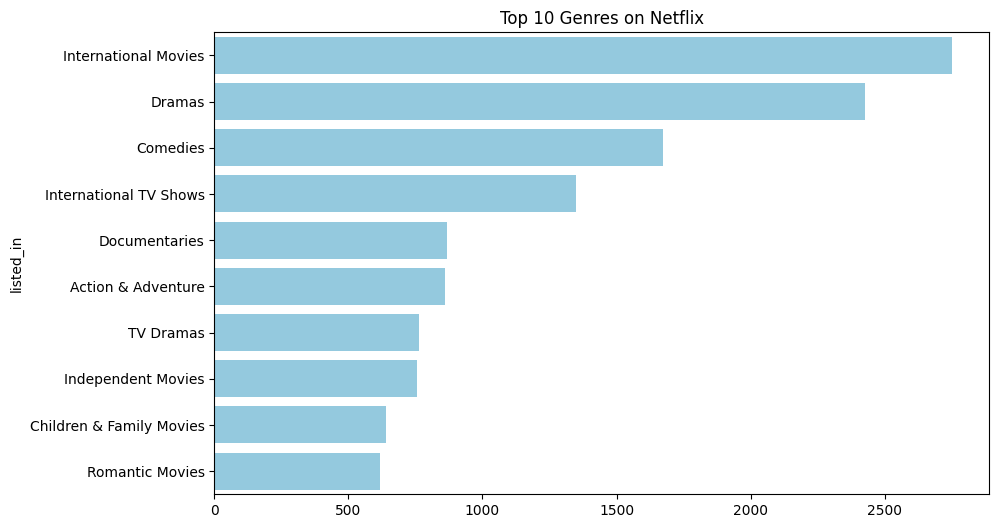

In [52]:
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.show()

In [53]:
# Question: What is the average duration of movies?

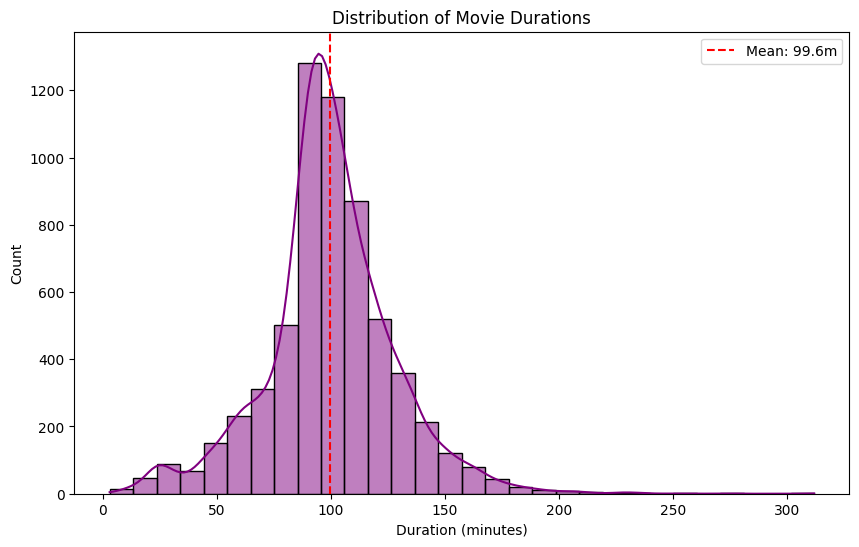

In [55]:
# 1. Filter for Movies
movies_df = df[df['type'] == 'Movie'].copy()

# 2. Extract numeric part safely
# We remove ' min', then convert to numeric. 
# 'coerce' turns errors (like 'Unknown') into NaN
movies_df['duration_min'] = pd.to_numeric(
    movies_df['duration'].str.replace(' min', '', regex=False), 
    errors='coerce'
)

# 3. Drop the NaNs so the histogram doesn't complain
movies_df = movies_df.dropna(subset=['duration_min'])

# 4. Plot
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='purple')
plt.axvline(movies_df['duration_min'].mean(), color='red', linestyle='--', 
            label=f"Mean: {movies_df['duration_min'].mean():.1f}m")

plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.legend()
plt.show()

In [56]:
# Goal: Recommend similar content based on genre.

In [57]:
def recommend(genre):
    return df[df["listed_in"].str.contains(genre, case=False)][["title","listed_in"]].head(10)
recommend("Drama")    

,title,listed_in
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
5,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries"
7,Sankofa,"Dramas, Independent Movies, International Movies"
9,The Starling,"Comedies, Dramas"
12,Je Suis Karl,"Dramas, International Movies"
15,Dear White People,"TV Comedies, TV Dramas"
17,Falsa identidad,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
21,Resurrection: Ertugrul,"International TV Shows, TV Action & Adventure,..."
30,Ankahi Kahaniya,"Dramas, Independent Movies, International Movies"
33,Squid Game,"International TV Shows, TV Dramas, TV Thrillers"


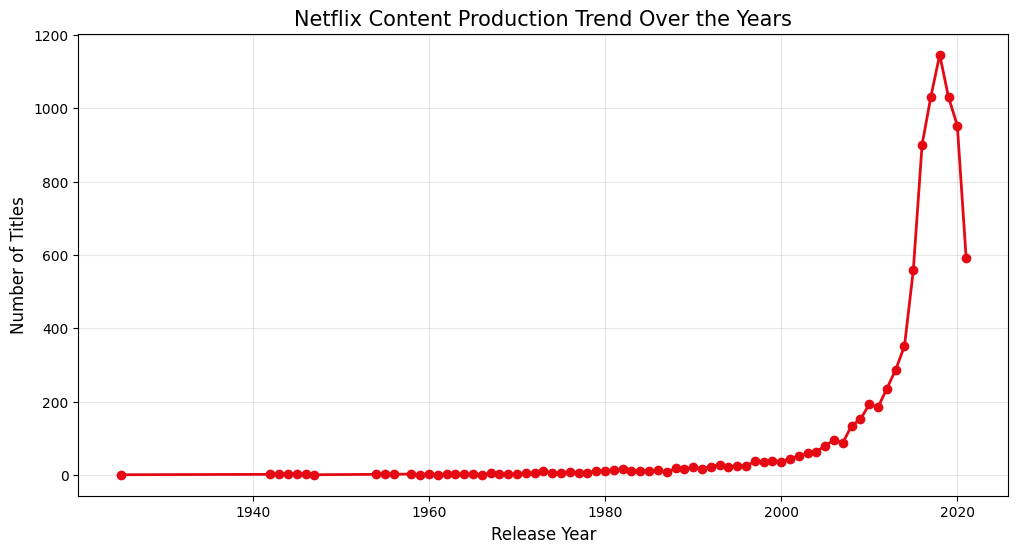

In [59]:
# Trend Prediction:
    # count release per year

# 1. Count releases per year and sort by the year (the index)
# Note the 's' in value_counts()
year_data = df["release_year"].value_counts().sort_index()

# 2. Plotting with a bit more style
plt.figure(figsize=(12, 6))
plt.plot(year_data.index, year_data.values, marker='o', linestyle='-', color='#E50914', linewidth=2)

# 3. Adding clear labels (essential for an analyst test!)
plt.title('Netflix Content Production Trend Over the Years', fontsize=15)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()